In [1]:
import sys
sys.path.insert(0, '../scripts/')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ruler.measures.cwl_rbp import RBPCWLMetric
from ruler.measures.cwl_inst import INSTCWLMetric
from ruler.measures.cwl_bpm import BPMDCWLMetric, BPMCWLMetric
from ruler.measures.cwl_rr import RRCWLMetric
from ruler.measures.cwl_ap import APCWLMetric
from ruler.measures.cwl_tbg import TBGCWLMetric
from ruler.measures.cwl_precision import PrecisionCWLMetric
from ruler.cwl_ruler import Ranking


def plot_three_cwl_measures(a, b, c=None):
    n=30
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(hspace=0.2)
    legend = [a.name(), b.name()]
    if c:
        legend.append(c.name())
        print(c.ranking.topic_id)
    
    ax = plt.subplot(131)
    plt.title('Continue')
    plt.plot(range(1,n+1), a.c_vector(a.ranking)[0:n])
    plt.plot(range(1,n+1), b.c_vector(b.ranking)[0:n])
    if c:
        plt.plot(range(1,n+1), c.c_vector(c.ranking)[0:n])
    plt.grid(True)
    ax.set_ylim(ymin=-0.01, ymax=1.01)

    ax = plt.subplot(132)
    plt.title('Weight')
    plt.plot(range(1,n+1), a.w_vector(a.ranking)[0:n])
    plt.plot(range(1,n+1), b.w_vector(b.ranking)[0:n])
    if c:
        plt.plot(range(1,n+1), c.w_vector(c.ranking)[0:n])
    plt.grid(True)
    ax.set_ylim(ymin=-0.01, ymax=1.01)

    ax = plt.subplot(133)
    plt.title('Last')
    plt.plot(range(1,n+1),a.l_vector(a.ranking)[0:n])
    plt.plot(range(1,n+1),b.l_vector(b.ranking)[0:n])
    if c:
        plt.plot(range(1,n+1), c.l_vector(c.ranking)[0:n])
    plt.grid(True)
    ax.set_ylim(ymin=-0.01, ymax=1.01)
    if legend:
        plt.legend(legend)


In [2]:
g1 = [ 1,0,1,1,0,0,1,0,1,0]
c1 = [ 12,13,2,3,4,5,6,33,1,1]
t1 = Ranking("T1",g1,c1)

In [3]:
rbp = RBPCWLMetric(theta=0.9)
rbp.measure(t1)
rbp.report()

T1	RBP@0.9	0.3501	3.5009	5.6361	56.3610	10.0000


In [4]:
print(rbp.c_vector(t1)[0:10])

[ 0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9]


In [5]:
print(rbp.w_vector(t1)[0:10])

[ 0.1         0.09        0.081       0.0729      0.06561     0.059049
  0.0531441   0.04782969  0.04304672  0.03874205]


In [6]:
print(rbp.l_vector(t1)[0:10])

[ 0.1         0.09        0.081       0.0729      0.06561     0.059049
  0.0531441   0.04782969  0.04304672  0.03874205]


In [7]:
inst = INSTCWLMetric(T=1)
inst.measure(t1)
inst.report()

T1	INST-T=1	0.7934	1.1719	10.8345	16.0034	1.4771


In [8]:
print(inst.c_vector(t1)[0:10])

[ 0.25        0.44444444  0.44444444  0.44444444  0.5625      0.64        0.64
  0.69444444  0.69444444  0.73469388]


In [9]:
print(inst.w_vector(t1)[0:10])

[ 0.67700797  0.16925199  0.07522311  0.03343249  0.01485889  0.00835812
  0.0053492   0.00342349  0.00237742  0.00165099]


In [10]:
print(inst.l_vector(t1)[0:10])

[  7.50000000e-01   1.38888889e-01   6.17283951e-02   2.74348422e-02
   9.60219479e-03   4.44444444e-03   2.84444444e-03   1.54513032e-03
   1.07300716e-03   6.46989477e-04]


In [11]:
bpm = BPMCWLMetric(T=2,K=10)
bpm.measure(t1)
bpm.report()

T1	BPM-Static-T=2-K=10	1.0000	1.0000	12.0000	12.0000	1.0000


T1


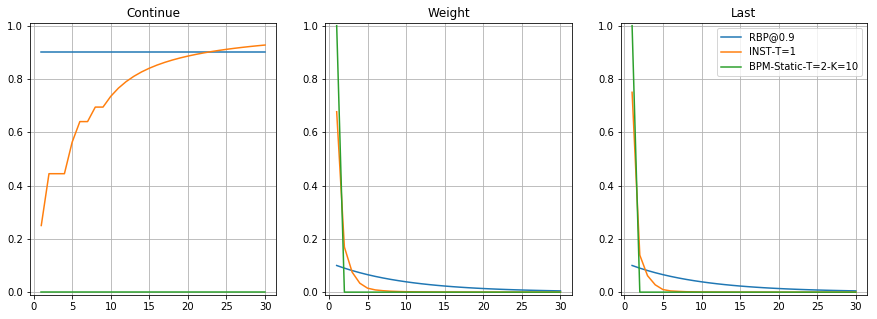

In [12]:
plot_three_cwl_measures(rbp,inst,bpm)

In [13]:
g1 = [ 1,1,0,0,0,0,1,0,1,0]
c1 = [ 1,1,1,1,1,1,1,1,1,1]

t2 = Ranking("T2",g1,c1)

bpm38 = BPMDCWLMetric(T=3, K=8, hc=1.0, hb=1.0)
bpm33 = BPMDCWLMetric(T=5, K=4, hc=1.0, hb=1.0)
bpm38.measure(t2)
bpm38.report()
bpm33.measure(t2)
bpm33.report()
bpm.measure(t2)
bpm.report()

T2	BPM-Dynamic-T=3-K=8-hb=1.0-hc=1.0	0.4286	3.0000	1.0000	7.0000	7.0000
T2	BPM-Dynamic-T=5-K=4-hb=1.0-hc=1.0	0.5000	2.0000	1.0000	4.0000	4.0000
T2	BPM-Static-T=2-K=10	1.0000	2.0000	1.0000	2.0000	2.0000


In [14]:
print(bpm.l_vector(t2)[0:10])
print(bpm33.l_vector(t2)[0:10])
print(bpm38.l_vector(t2)[0:10])


[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


T2


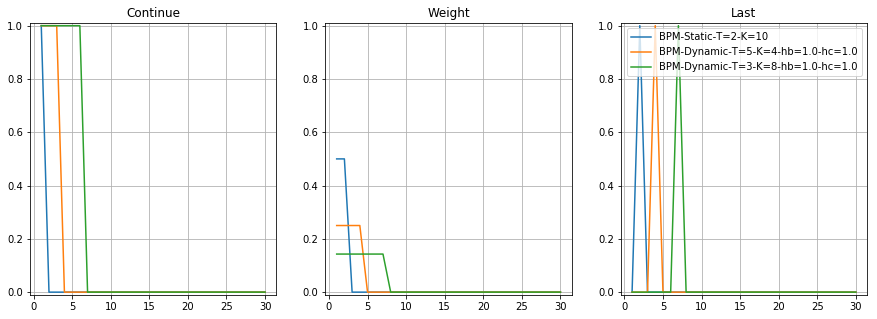

In [15]:
plot_three_cwl_measures( bpm, bpm33, bpm38)

In [16]:
rr = RRCWLMetric()
rr.measure(t1)
rr.report()

T1	RR	1.0000	1.0000	12.0000	12.0000	1.0000


In [17]:
ap = APCWLMetric()
ap.measure(t1)
ap.report()

T1	AP	0.7087	1.9287	8.7413	23.7883	2.7214


In [18]:
tbg = TBGCWLMetric(halflife=20)
tbg.measure(t1)
tbg.report()

T1	TBG-H@20 	0.4580	1.3461	12.8798	37.8543	2.9390


T1


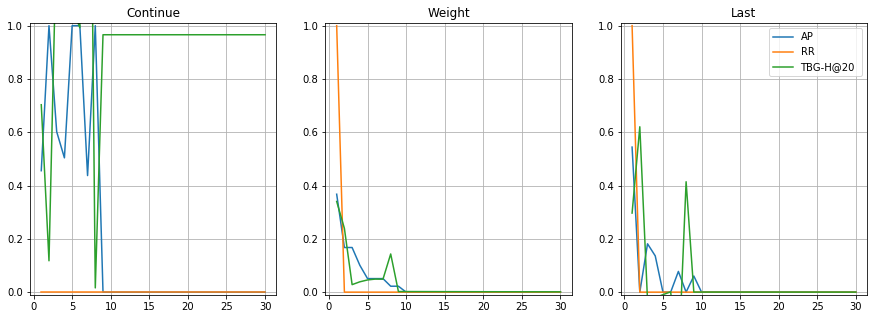

In [19]:
plot_three_cwl_measures( ap, rr, tbg)